# 💠BASIC STATISTICS💠

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import statistics as st
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv('sales_data_with_discounts.csv')
data['Date']=pd.to_datetime(data['Date'])
print('⇒ Shape of data ',data.shape)
data.head()

⇒ Shape of data  (450, 13)


C:\Users\MAYUR\AppData\Local\Temp\ipykernel_13320\95380819.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2021-01-04,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,2021-01-04,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,2021-01-04,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,2021-01-04,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,2021-01-04,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               450 non-null    datetime64[ns]
 1   Day                450 non-null    object        
 2   SKU                450 non-null    object        
 3   City               450 non-null    object        
 4   Volume             450 non-null    int64         
 5   BU                 450 non-null    object        
 6   Brand              450 non-null    object        
 7   Model              450 non-null    object        
 8   Avg Price          450 non-null    int64         
 9   Total Sales Value  450 non-null    int64         
 10  Discount Rate (%)  450 non-null    float64       
 11  Discount Amount    450 non-null    float64       
 12  Net Sales Value    450 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usag

## Descriptive Analytics for Numerical Columns

In [4]:
Num_columns=[x for x in data.columns if ((data[x].dtype=='int64') or (data[x].dtype==float))]
Num_columns

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [5]:
Describe={
'Columns':Num_columns,
'Mean':list(data[Num_columns].describe().transpose()['mean']),
'Median':list(data[Num_columns].describe().transpose()['50%']),
'Mode':[st.mode(data[x]) for x in Num_columns],
'Standard_deviation':list(data[Num_columns].describe().transpose()['std'])
           }

Describe=pd.DataFrame(Describe).set_index('Columns')
Describe

,Mean,Median,Mode,Standard_deviation
Columns,,,,
Volume,5.066667,4.000000,3.00000,4.231602
Avg Price,10453.433333,1450.000000,8100.00000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.00000,50535.074173
Discount Rate (%),15.155242,16.577766,11.65482,4.220602
Discount Amount,3346.499424,988.933733,21153.49882,4509.902963
Net Sales Value,30466.336131,4677.788059,160346.50118,46358.656624


## Data Visualization

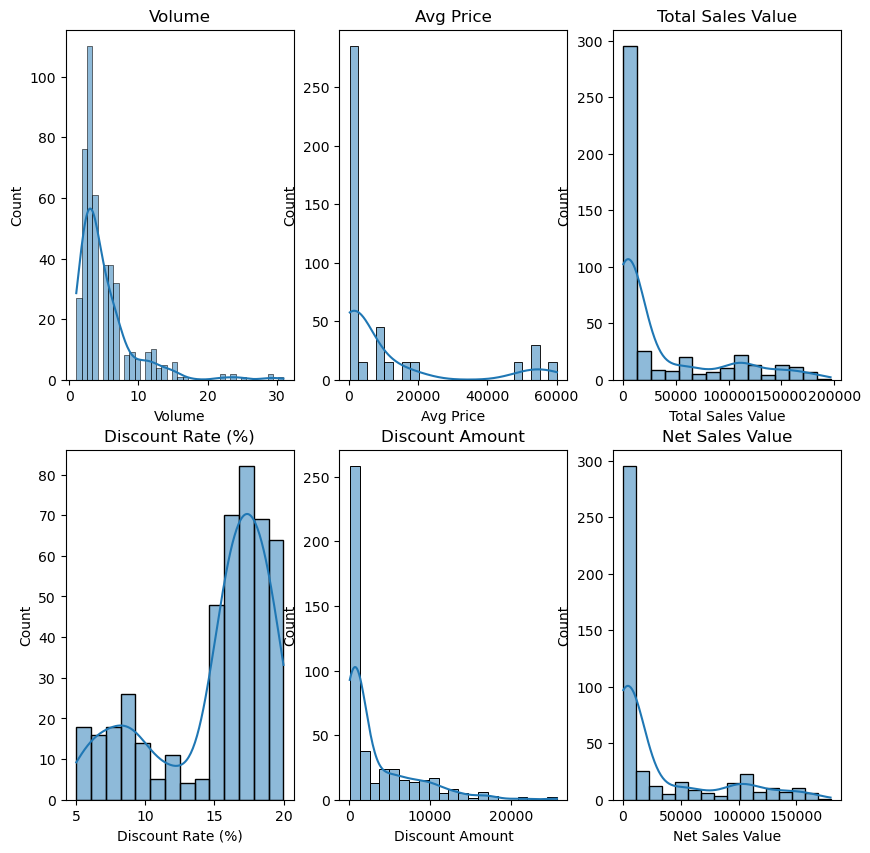

In [6]:
plt.figure(figsize=(10,10))

for x,y in enumerate(Num_columns):
    plt.subplot(2,3,x+1)
    sns.histplot(data[y],kde=True)
    plt.title(y)
plt.show()
    

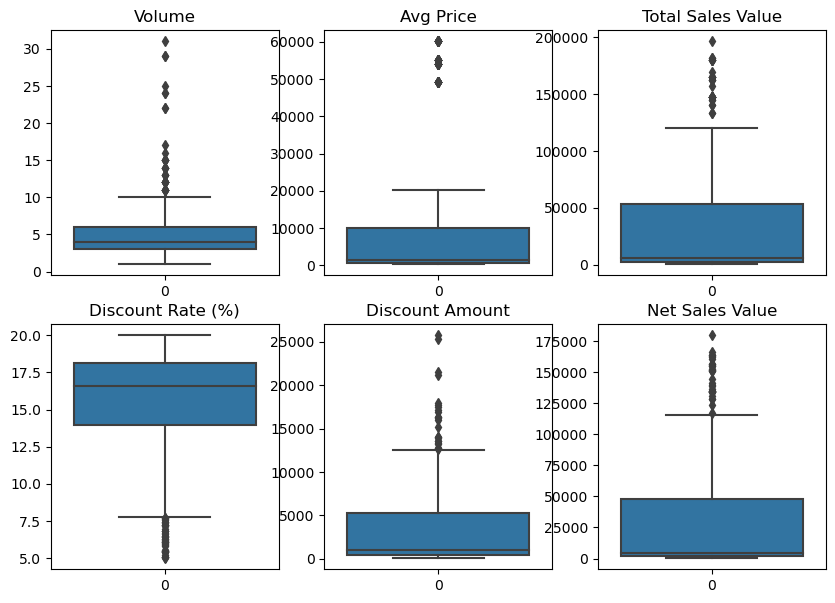

In [7]:
plt.figure(figsize=(10,7))

for x,y in enumerate(Num_columns):
    plt.subplot(2,3,x+1)
    sns.boxplot(data[y])
    plt.title(y)
plt.show()

In [8]:
Categ_columns=[x for x in data.columns if data[x].dtype=='object']
Categ_columns

['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

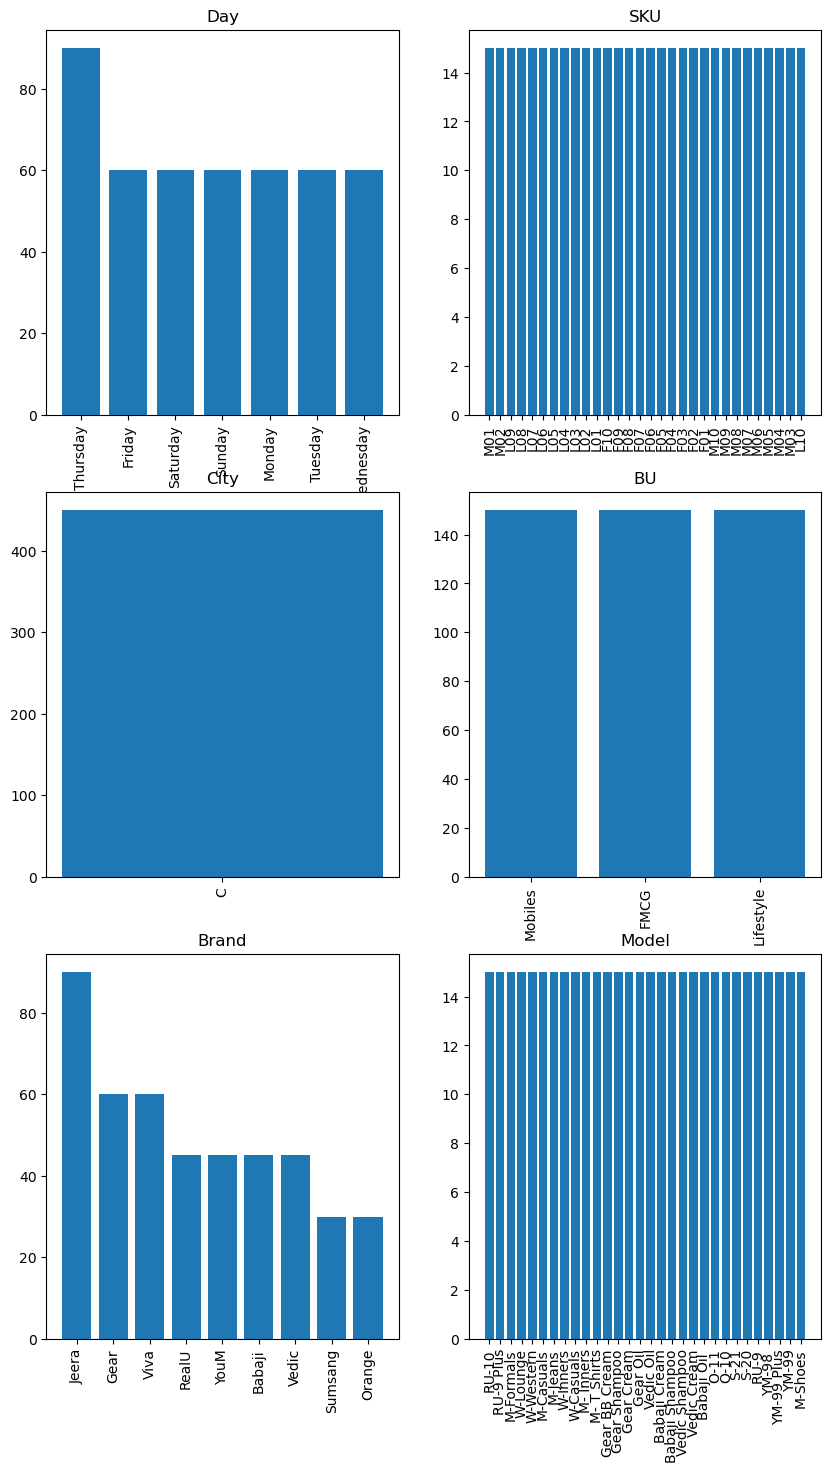

In [9]:
plt.figure(figsize=(10,17))

for x,y in enumerate(Categ_columns):
    plt.subplot(3,2,x+1)
    plt.bar(data[y].value_counts().index,height=data[y].value_counts())
    plt.xticks(rotation=90)
    plt.title(y)
plt.show()

## 💠Standardization of Numerical Variables

### ⇒ Z-scores are particularly useful when comparing data from different distributions or data sets with varying means and standard deviations.

### ⇒ Z-scores represent the number of standard deviations a particular value is away from the mean of a data set.

### ⇒ Z-score normalization refers to the process of normalizing every value in a dataset such that the mean of all of the values is 0 and the standard deviation is1

In [10]:
from sklearn.preprocessing import StandardScaler
Stdsc=StandardScaler()
df=Stdsc.fit_transform(data[Num_columns])
df1=pd.DataFrame(df,columns=Num_columns)
df1.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595


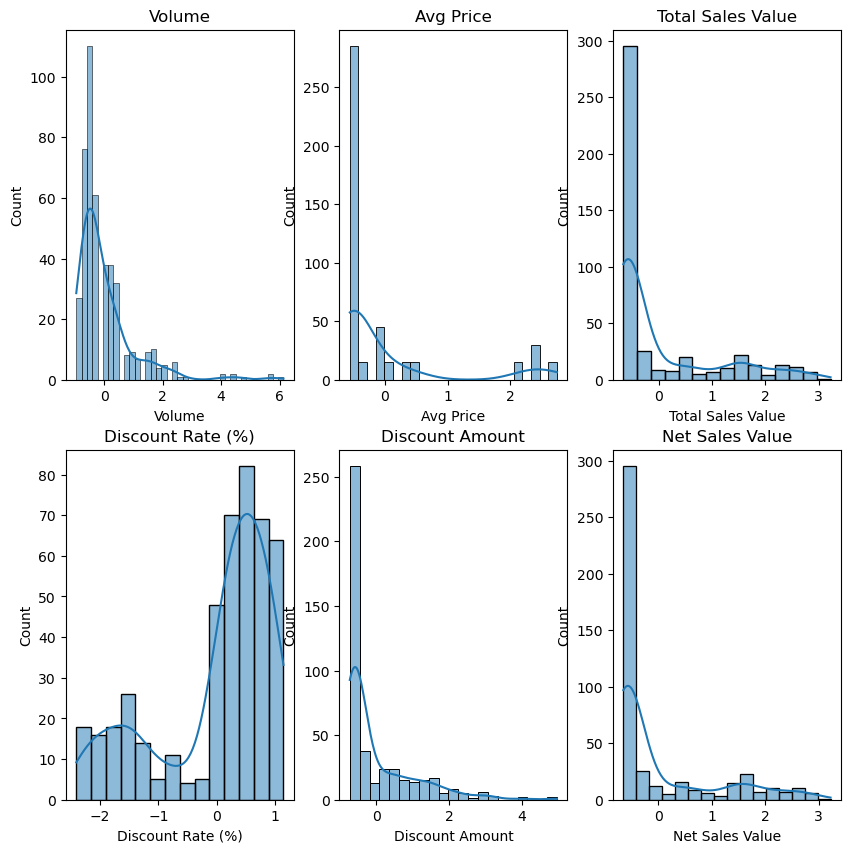

In [11]:
plt.figure(figsize=(10,10))

for x,y in enumerate(Num_columns):
    plt.subplot(2,3,x+1)
    sns.histplot(df1[y],kde=True)
    plt.title(y)
plt.show()
    
    

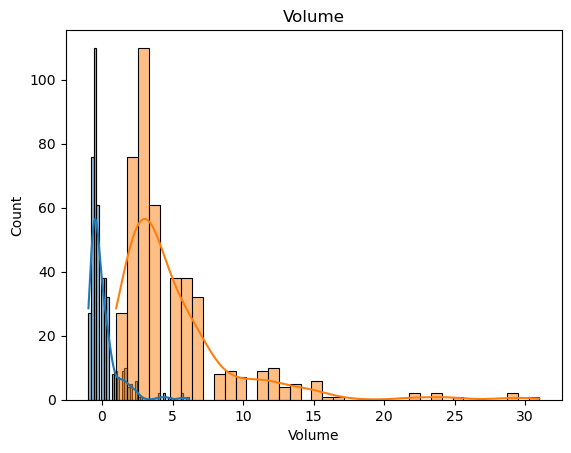

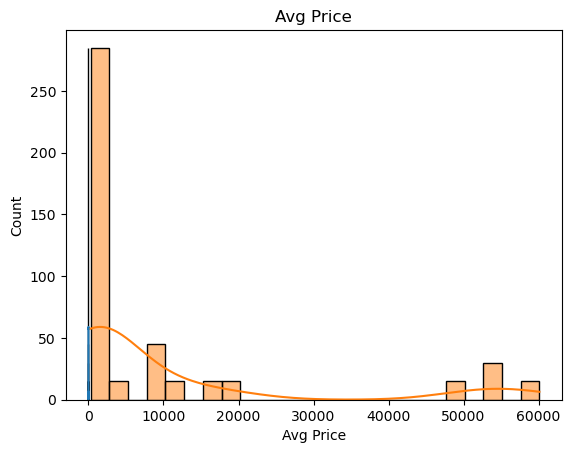

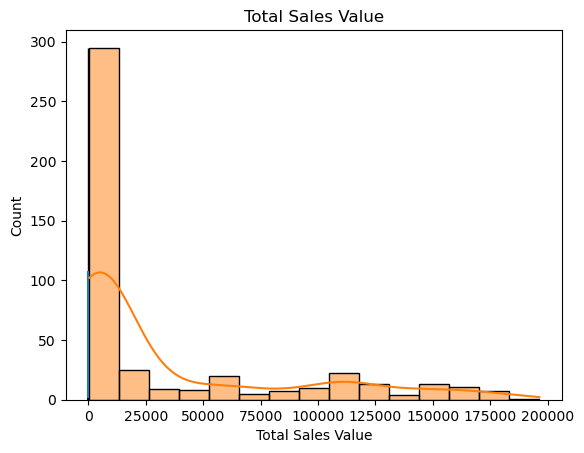

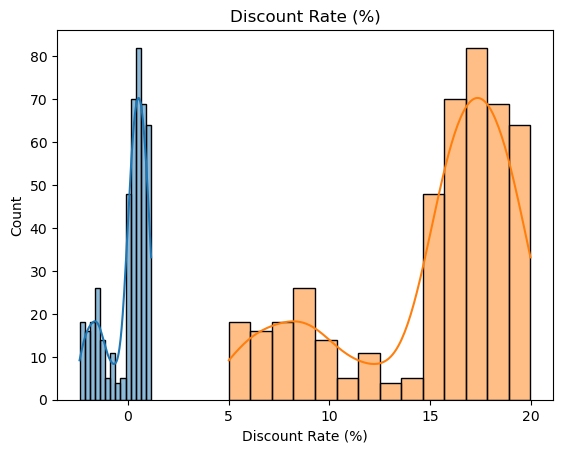

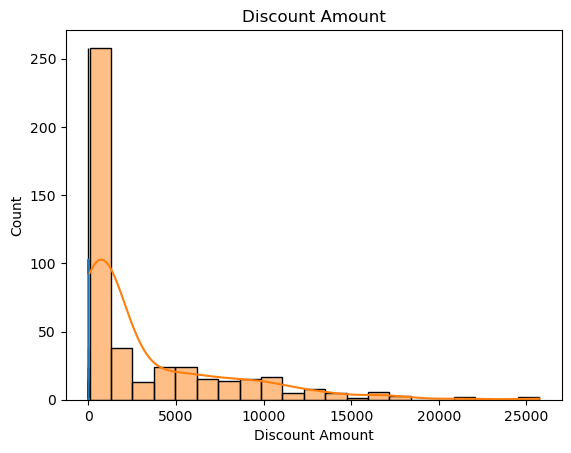

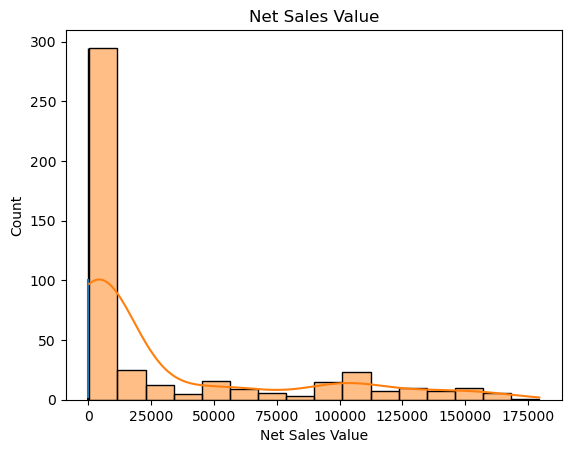

In [12]:
for x,y in enumerate(Num_columns):
    sns.histplot(df1[y],kde=True)
    sns.histplot(data[y],kde=True)
    plt.title(y)
    plt.show()
    

## 💠Conversion of Categorical Data into Dummy Variables

### ⇒  Since all the ML models are based on statistical models it is important to feed them with the data which is in the numeric form, as we have data in categorical variable the model cannot interpret it which can lead to miscalculation which ultimately affects the model accuracy.

### ⇒ Hence it is important to convert these variables into dummy variables.
### Assume we have 'N' categories the dummy variables will be 'N-1' in numbers to reduce the multicollinearity.

In [13]:
from sklearn.preprocessing import OneHotEncoder 

Encoder=OneHotEncoder(sparse_output=False,drop='first')

df=Encoder.fit_transform(data[Categ_columns])
df2=pd.DataFrame(df)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 💠Final DataFrame that can we provide to a ML model

In [14]:
DF=pd.concat([df1,df2],axis=1)                      
DF.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,0,1,2,3,...,64,65,66,67,68,69,70,71,72,73
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 💠Conclusion

### ⇒ ['Volume','Avg Price','Total Sales Value','Discount Amount','Net Sales Value'] these variables showes Right skewed distribution which means majority data points are on the leftside of mean and the outliers are greater than mean.

### ⇒ [Discount Rate (%)] this variable shows Left skewed distribution which means the outliers lies on right side of mean and majority of data on right side of mean 

### ⇒ Jeera is most purchased brand while Samsung and Orange are least purchased brands

### ⇒The importance of data preprocessing steps like standardization and one-hot encoding in data analysis and machine learning are :
#### 1] Improves the quality of data hence helps to improve model accuracy.

#### 2] Reduces overfitting 

#### 3] Since data is normalized it reduces runtime and encoded  categorical data helps to reduce miscalculation and imporves the data interpretation  processs of model.